# Exploratory data analysis (EDA) of car data

## Libraries and settings

In [1]:
# Libraries
import os
import random
import squarify
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# seaborn graphics settings
sns.set_theme(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/scientific_programming/Week_05/exercises


## Importing the car data

### Importing the car data

In [3]:
# Columns to read
columns = ["Offer_Id",
            "Type",
            "Price",
            "HP",
            "Mileage",
            "Fuel_Type",
            "Transmission",
            "Dealer_PLZ",
            "Dealer_City",
            "Dealer_Street_House_Nr",
            "Init_Regist_MY",
            "Init_Regist_Month",
            "Init_Regist_Year",
            "Init_Regist_Dt"]

# Read and select variables
df_orig = pd.read_csv("./data/autoscout24_data_enriched_cleaned.csv", sep=",")[columns]

# Change column names to lower case
df_orig.columns = df_orig.columns.str.lower()

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df = df_orig.dropna()
df.head(5)

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,22500,245,75000,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),23749,184,46655,Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,18500,306,138955,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,36000,360,43000,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,48500,252,43300,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09


## Univariate non-graphical exploratory data analysis (EDA)

### Quantiles

In [ ]:
# Calculate Quantiles 
df[['price', 'hp', 'mileage']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

### Shape (number of rows and colums)

In [ ]:
# Number of rows and columns
print(df.shape)

### Data types

In [ ]:
# Show data types
df.dtypes

### Summary statistics of numeric variables

In [ ]:
# Show summary statistics of variables
df.describe()

### Statistical measures (min, max, std, mean, median, count) for selected variables

In [ ]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.mileage.count(), 1),
      'Min:', round(df.mileage.min(), 1),
      'Max:', round(df.mileage.max(), 1),
      'Mean:', round(df.mileage.mean(), 1),
      'Median:', round(df.mileage.median(), 1),
      'Std:', round(df.mileage.std(), 1))

### Skewness

In [ ]:
df[['price', 'hp', 'mileage']].skew()

### Kurtosis

In [ ]:
df[['price', 'hp', 'mileage']].kurtosis()

### Extreme values

In [ ]:
# Low costs cars
df[df['price'] <= 500]

In [ ]:
# Very expansive cars
df[df['price'] >= 250000]

### Get a list of categories of categorical variable

In [ ]:
np.array(pd.Categorical(df['fuel_type']).categories)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [4]:
pd.crosstab(df['fuel_type'], df['transmission'])

transmission,Allrad,Automat,Automat sequentiell,Automat stufenlos,"Automat stufenlos, sequentiell",Automatik-Getriebe,Automatisiertes Schaltgetriebe,Hinterradantrieb,Schaltgetriebe,Schaltgetriebe manuell,Schaltgetriebe sequentiell
fuel_type,,,,,,,,,,,
Automat,0,0,0,0,0,0,0,1,0,0,0
Automatik-Getriebe,1,0,0,0,0,0,0,0,0,0,0
Benzin,1,244,487,8,25,62,713,1,35,1070,2
Diesel,0,64,564,1,11,21,198,0,10,306,0
Elektro,0,0,0,6,0,1,58,0,0,2,0
Erdgas (CNG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Flüssiggas (LPG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Hybrid Benzin/Elektro,0,0,0,0,0,1,0,0,0,0,0
Hybrid Diesel/Elektro,0,0,0,0,0,0,0,0,1,0,0


### Pivot tables

In [ ]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['mileage', 'price', 'hp', 'fuel_type']],
               index=['fuel_type'],
               values=['price', 'mileage', 'hp'],
               aggfunc=(np.mean, 'count')).round(2)

### Correlation matrix

In [ ]:
corr = df[['mileage', 
          'price', 
          'hp', 
]].corr()
corr

### Covariance matrix

In [ ]:
cov = df[['mileage', 
          'price', 
          'hp', 
]].cov()
cov

## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

In [ ]:
# Generate time series data for mean car prices over the last 20 years
x = []
y = []

# Start from 25 years ago with an initial price
start_date_trend = datetime(2000, 1, 1)
initial_price = 100

for i in range(25):
    date = start_date_trend + timedelta(days=365 * i)
    price_increase_factor = 1 + random.uniform(0.01, 0.02)
    initial_price *= price_increase_factor
    x.append(date)
    y.append(round(initial_price, 2))

# Create a DataFrame to display the data
rental_prices_trend_df = pd.DataFrame({
    "Year": x,
    "Price (USD)": y
})


# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of mean car prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

In [ ]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['mileage'], color="greenyellow")

### Histogram  (matplotlib)

In [ ]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of price', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

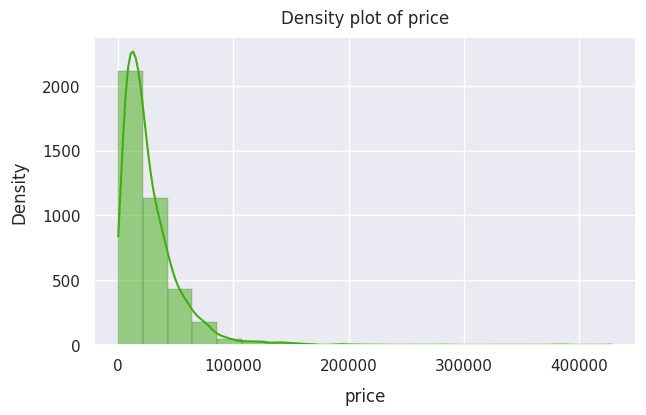

In [5]:
plt.figure(figsize=(7,4))
sns.histplot(df['price'], 
             bins=20, 
             color='#42AD12',
             alpha=0.5,
             kde=True, 
             edgecolor='black', 
             linewidth=0.1)

plt.title('Density plot of price', fontsize=12, pad=10)
plt.xlabel('price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      mileage       var
1140        1 -1.521350
832         1 -1.521350
3418       10 -1.521202
3618       10 -1.521202
2695       11 -1.521186
...       ...       ...
2597   340890  4.058032
3073   344500  4.117117
2723   355000  4.288972
1288   356673  4.316355
988    370000  4.534480

[3971 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

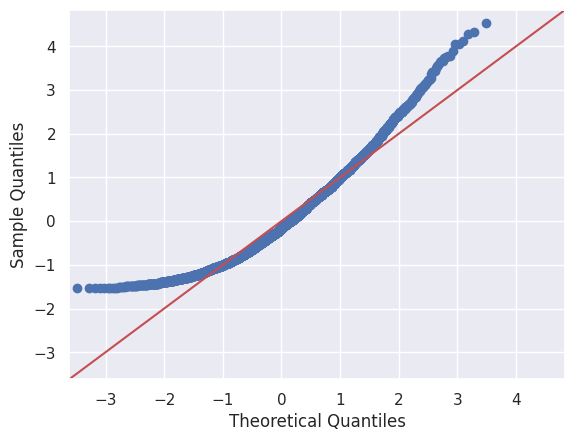

In [6]:
# Variable (standardized)
x = 'mileage'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['mileage', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
plt.show

### Barchart  (matplotlib)

In [ ]:
# Group data by fuel_type (only the topmost 15 values are shown)
df_bar = df['fuel_type'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of cars', fontsize=10)
ax.set_ylabel('Fuel type', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

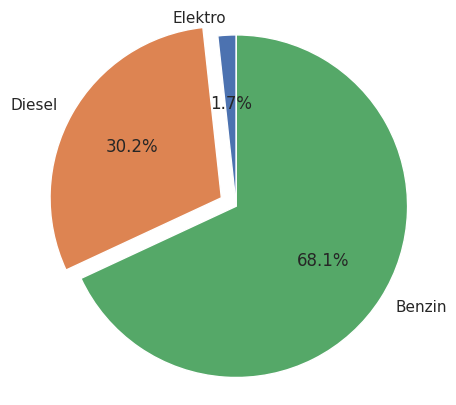

In [7]:
# Subset of cars with fuel type
df_fuel = df[df['fuel_type'].isin(['Diesel', 'Benzin', 'Elektro'])]

# Group data (only the 8 most frequently occurencies by fuel type)
df_bar = df_fuel.fuel_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0.1, 0) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(df['hp'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('hp')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

In [ ]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.hp, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.hp, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.hp, 
         b*df_sub.hp + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('hp', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

In [ ]:
sns.set_theme(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['mileage', 
                     'hp', 
                     'price']], 
                 height=1.8, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

In [ ]:
# Subset
df_sub = df.loc[(df.price <= 100000) & (df.hp <= 400)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.hp, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('hp', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus hp', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

In [ ]:
# Set font size for plot
sns.set_theme(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
corr = df[['mileage', 
            'hp', 
            'price']].corr().round(2)
print(corr)

# Plot heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

In [ ]:
# Calculate price per hp
df['price_per_hp'] = df['price'] / df['hp']

# Subset of df
df_sub = df.loc[(df['price'] >= 25000) & (df['price'] <= 100000)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="mileage", 
                     y="price",
                     size="price_per_hp", # determines bubble size
                     hue="mileage",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs mileage', fontsize = 12)
ax.set_xlabel('mileage', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

## Treemap of car makes (squarify)

In [ ]:
# Extract the first word from each string
df['make'] = df['type'].str.split().str[0]

plt.figure(figsize=(8, 5))
top_brands = df['make'].value_counts().nlargest(20)
colors = ['#FF6347', '#FFD700', '#ADFF2F', '#00FA9A', '#00CED1', '#1E90FF', 
          '#9370DB', '#FF69B4', '#8B4513', '#B22222', '#FF4500', '#DA70D6', 
          '#32CD32', '#4682B4', '#D2691E', '#8A2BE2', '#A52A2A', '#5F9EA0', 
          '#7FFF00', '#DDA0DD']
squarify.plot(sizes=top_brands, 
              label=top_brands.index, 
              alpha=0.7, 
              color=colors[:len(top_brands)])
plt.title('Treemap with top 20 car brands')
plt.axis('off')
plt.show()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')